In [151]:
import numpy as np
import pandas as pd
import seaborn as sns

In [152]:
treino = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [153]:
treino.shape

(891, 12)

In [154]:
test.shape

(418, 11)

In [155]:
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [156]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [157]:
#verificando quantos dados faltantes existem
treino.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [158]:
#verificando quantos dados faltantes existem
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

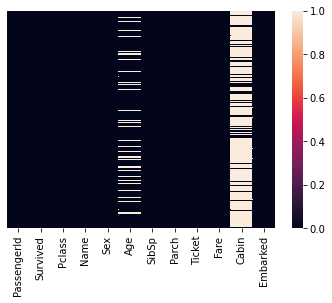

In [159]:
#verificando quantos dados faltantes existem visualmente
sns.heatmap(treino.isnull(),yticklabels=False,cbar=True)

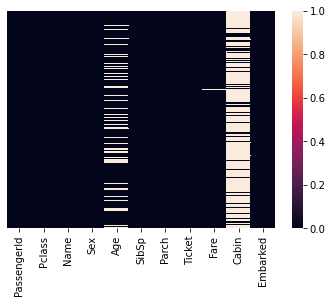

In [160]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=True)

In [161]:
# tratando os dados missing 
treino['Age'] = treino['Age'].fillna(treino['Age'].mean())
treino['Cabin'] = treino['Cabin'].fillna(treino['Cabin'].mode()[0])

In [162]:
treino.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [163]:
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Cabin'] = test['Cabin'].fillna(test['Cabin'].mode()[0])

In [164]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [165]:
from sklearn.preprocessing import LabelEncoder
label_enconder = LabelEncoder()
treino['sex_numerico'] = label_enconder.fit_transform(treino['Sex'])

In [166]:
test['sex_numerico'] = label_enconder.fit_transform(test['Sex'])

In [167]:
preditores = ['sex_numerico','Age']
x_train = treino[preditores]
y_train = treino['Survived']

In [199]:
from sklearn.ensemble import RandomForestClassifier
arvore_randon_titanic = RandomForestClassifier(n_estimators=250,criterion='entropy',random_state=0)

In [200]:
arvore_randon_titanic.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=250, random_state=0)

In [201]:
preditores_test = ['sex_numerico','Age' ]
x_test = test[preditores_test]
predictions = arvore_randon_titanic.predict(x_test)
predictions.shape

(418,)

In [202]:
#verificando acuracia
from sklearn.metrics import accuracy_score
resultado = pd.read_csv('gender_submission.csv')
y_test = resultado['Survived']
accuracy_score(y_test,predictions)

0.8636363636363636

In [203]:
#salvando resultado para submeter no campeonato kaggle
result = pd.Series(predictions,index = test['PassengerId'],name='Survived')
result.to_csv('second_attempt.csv',header=True )